In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#upload the dataset on the left side in the folder for google collab first collected school data - https://docs.google.com/spreadsheets/d/1nnxghnlQG2ZtCIplWtgLhrakPdrW0Uem5rewHSeRN2c/edit?usp=sharing

import pandas as pd
data = pd.read_csv("/content/school.csv")

In [ ]:
data.drop("Index", axis=1, inplace=True)

In [ ]:
data

,School Name,Total Enrolments,Student Teacher Ratio,One AP Test,Math Scoring,English Scoring,Graduation Rate,Minority Enrolment,Free Lunch Program,College Readiness
0,AAEC: Paradise Valley,322.0,NaN,NaN,42.0,NaN,97,28.6,NaN,NaN
1,AAEC: South Mountain,499.0,NaN,NaN,12.0,NaN,100,93.8,18.0,NaN
2,Accelarated :Learning Center,151.0,NaN,NaN,NaN,NaN,62,25.8,NaN,NaN
3,Alhambra High School,2395.0,18:1,5.0,21.0,NaN,70,95.8,78.0,14.5
4,Arcadia High School,1625.0,23:1,21.0,29.0,NaN,94,49.0,12.0,29.6
...,...,...,...,...,...,...,...,...,...,...
110,Roadrunner School,16.0,4:1,NaN,30.0,30,NaN,52.0,25.0,NaN
111,Ridgeline Academy Inc.,138.0,NaN,NaN,30.0,30,100,29.0,5.0,NaN
112,Pxu Digital Academy,1232.0,79:1,NaN,30.0,30,29,95.0,NaN,NaN
113,Pvonline,247.0,20:1,NaN,37.0,47,82,50.0,NaN,NaN


In [ ]:
missing_values_per_column = data.isnull().sum()

print("Number of missing values in each column:")
print(missing_values_per_column)

Number of missing values in each column:
School Name               0
Total Enrolments          1
Student Teacher Ratio    71
One AP Test              69
Math Scoring             38
English Scoring          54
Graduation Rate          10
Minority Enrolment        1
Free Lunch Program       35
College Readiness        70
dtype: int64


In [ ]:
columns_to_check = ['School Name',	'Total Enrolments',	'Student Teacher Ratio',	'One AP Test',	'Math Scoring',	'English Scoring',	'Graduation Rate',	'Minority Enrolment',	'Free Lunch Program',	'College Readiness']

for col in columns_to_check:
    if data[col].astype(str).str.contains('%').any():
        print(f"Column '{col}' contains '%' signs.")
    else:
        print(f"{col} coloumn has non numeric characters.")

School Name coloumn has non numeric characters.
Total Enrolments coloumn has non numeric characters.
Student Teacher Ratio coloumn has non numeric characters.
One AP Test coloumn has non numeric characters.
Math Scoring coloumn has non numeric characters.
Column 'English Scoring' contains '%' signs.
Column 'Graduation Rate' contains '%' signs.
Minority Enrolment coloumn has non numeric characters.
Free Lunch Program coloumn has non numeric characters.
College Readiness coloumn has non numeric characters.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

first_transform_df = data.copy()

first_transform_df['Graduation Rate'] = first_transform_df['Graduation Rate'].replace('%', '', regex=True).astype(float)
first_transform_df['English Scoring'] = first_transform_df['English Scoring'].replace('%', '', regex=True).astype(float)

numerical_columns = ['Total Enrolments','One AP Test',	'Math Scoring',	'English Scoring',	'Graduation Rate',	'Minority Enrolment',	'Free Lunch Program',	'College Readiness']

scaler = MinMaxScaler()
first_transform_df[numerical_columns] = scaler.fit_transform(first_transform_df[numerical_columns])

In [ ]:
first_transform_df

,School Name,Total Enrolments,Student Teacher Ratio,One AP Test,Math Scoring,English Scoring,Graduation Rate,Minority Enrolment,Free Lunch Program,College Readiness
0,AAEC: Paradise Valley,0.106201,NaN,NaN,0.428571,NaN,0.97,0.286,NaN,NaN
1,AAEC: South Mountain,0.164578,NaN,NaN,0.122449,NaN,1.00,0.938,0.181818,NaN
2,Accelarated :Learning Center,0.049802,NaN,NaN,NaN,NaN,0.62,0.258,NaN,NaN
3,Alhambra High School,0.789908,18:1,0.05,0.214286,NaN,0.70,0.958,0.787879,0.145
4,Arcadia High School,0.535950,23:1,0.21,0.295918,NaN,0.94,0.490,0.121212,0.296
...,...,...,...,...,...,...,...,...,...,...
110,Roadrunner School,0.005277,4:1,NaN,0.306122,0.38961,NaN,0.520,0.252525,NaN
111,Ridgeline Academy Inc.,0.045515,NaN,NaN,0.306122,0.38961,1.00,0.290,0.050505,NaN
112,Pxu Digital Academy,0.406332,79:1,NaN,0.306122,0.38961,0.29,0.950,NaN,NaN
113,Pvonline,0.081464,20:1,NaN,0.377551,0.61039,0.82,0.500,NaN,NaN


In [ ]:
columns_to_drop = ['Student Teacher Ratio']

second_df = first_transform_df.drop(columns=columns_to_drop)

In [ ]:
second_df

,School Name,Total Enrolments,One AP Test,Math Scoring,English Scoring,Graduation Rate,Minority Enrolment,Free Lunch Program,College Readiness
0,AAEC: Paradise Valley,0.106201,NaN,0.428571,NaN,0.97,0.286,NaN,NaN
1,AAEC: South Mountain,0.164578,NaN,0.122449,NaN,1.00,0.938,0.181818,NaN
2,Accelarated :Learning Center,0.049802,NaN,NaN,NaN,0.62,0.258,NaN,NaN
3,Alhambra High School,0.789908,0.05,0.214286,NaN,0.70,0.958,0.787879,0.145
4,Arcadia High School,0.535950,0.21,0.295918,NaN,0.94,0.490,0.121212,0.296
...,...,...,...,...,...,...,...,...,...
110,Roadrunner School,0.005277,NaN,0.306122,0.38961,NaN,0.520,0.252525,NaN
111,Ridgeline Academy Inc.,0.045515,NaN,0.306122,0.38961,1.00,0.290,0.050505,NaN
112,Pxu Digital Academy,0.406332,NaN,0.306122,0.38961,0.29,0.950,NaN,NaN
113,Pvonline,0.081464,NaN,0.377551,0.61039,0.82,0.500,NaN,NaN


In [ ]:
duplicate = second_df[second_df.duplicated(subset='School Name', keep=False)]
print("Duplicate Values:")
duplicate

Duplicate Values:


,School Name,Total Enrolments,One AP Test,Math Scoring,English Scoring,Graduation Rate,Minority Enrolment,Free Lunch Program,College Readiness
83,Premier Charter High School,0.048153,0.0,0.000000,0.00000,0.35,0.993,0.393939,0.0
114,Premier Charter High School,0.048153,NaN,0.306122,0.38961,0.35,0.990,0.393939,NaN


In [ ]:
third_df = second_df.groupby('School Name').agg(lambda x: x.max()).reset_index()

In [ ]:
duplicate = third_df[third_df.duplicated(subset='School Name', keep=False)]
print("Duplicate Values:")
duplicate

Duplicate Values:


,School Name,Total Enrolments,One AP Test,Math Scoring,English Scoring,Graduation Rate,Minority Enrolment,Free Lunch Program,College Readiness


In [ ]:
mean_columns = ['One AP Test', 'English Scoring', 'College Readiness']
for column in mean_columns:
    mean_value = third_df[column].mean()
    third_df[column].fillna(mean_value, inplace=True)

In [ ]:
third_df

,School Name,Total Enrolments,One AP Test,Math Scoring,English Scoring,Graduation Rate,Minority Enrolment,Free Lunch Program,College Readiness
0,AAEC: Paradise Valley,0.106201,0.251522,0.428571,0.391991,0.97,0.286,NaN,0.219622
1,AAEC: South Mountain,0.164578,0.251522,0.122449,0.391991,1.00,0.938,0.181818,0.219622
2,ASU Preparatory Academy- Phoenix High School,0.108509,0.040000,0.275510,0.391991,0.97,0.933,0.181818,0.074000
3,Accelarated :Learning Center,0.049802,0.251522,NaN,0.391991,0.62,0.258,NaN,0.219622
4,Alhambra High School,0.789908,0.050000,0.214286,0.391991,0.70,0.958,0.787879,0.145000
...,...,...,...,...,...,...,...,...,...
109,West-Mec - Paradise Valley High School,0.008245,0.251522,0.306122,0.389610,0.00,0.640,0.000000,0.219622
110,West-Mec - Pinnacle High School,0.008575,0.251522,0.306122,0.389610,0.00,0.346,0.000000,0.219622
111,Western School of Science and Technology,0.114116,0.430000,0.173469,0.415584,0.95,0.991,0.262626,0.135000
112,Westland School,0.023747,0.251522,0.306122,0.389610,0.50,0.831,0.767677,0.219622


In [ ]:
third_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   School Name         114 non-null    object 
 1   Total Enrolments    113 non-null    float64
 2   One AP Test         114 non-null    float64
 3   Math Scoring        76 non-null     float64
 4   English Scoring     114 non-null    float64
 5   Graduation Rate     104 non-null    float64
 6   Minority Enrolment  113 non-null    float64
 7   Free Lunch Program  79 non-null     float64
 8   College Readiness   114 non-null    float64
dtypes: float64(8), object(1)
memory usage: 8.1+ KB


In [ ]:
cols_to_drop_na = ['Total Enrolments', 'Math Scoring', 'Graduation Rate', 'Minority Enrolment', 'Free Lunch Program']
third_df.dropna(subset=cols_to_drop_na, inplace=True)

In [ ]:
print("Dimensions of the DataFrame after being cleaned and transformed as per the Plan: {}".format(third_df.shape))

Dimensions of the DataFrame after being cleaned and transformed as per the Plan: (62, 9)


In [ ]:
final_df = third_df

In [ ]:
final_df.to_csv('final_df_extra_credit.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = final_df[['Total Enrolments','One AP Test','English Scoring','Graduation Rate','Minority Enrolment','Free Lunch Program','College Readiness']]
y = final_df['Math Scoring']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error (MSE) - Measures the average of the squares of the errors')
print(mse,'\n')
print('Root Mean Squared Error (RMSE)- Represents the square root of the MSE')
print(rmse,'\n')
print('R-squared (R²) - Indicates the proportion of variance in the dependent variable that is predictable from the independent variables')
print(r2,'\n')

print("Coefficient Interpretation:")
for feature, coefficient in zip(X.columns, model.coef_):
    if coefficient > 0:
        print(f"A one-unit increase in {feature} is associated with an increase of in Math Scoring by -  {coefficient:.4f}")
    elif coefficient < 0:
        print(f"A one-unit increase in {feature} is associated with a decrease of in Math Scoring by - {abs(coefficient):.4f}")
    else:
        print(f"The {feature} does not have a significant impact on Math Scoring.")

print('\nIntercept (baseline Math Scoring when all other factors are zero):', model.intercept_)


Mean Squared Error (MSE) - Measures the average of the squares of the errors
0.027787678827900356 

Root Mean Squared Error (RMSE)- Represents the square root of the MSE
0.1666963671706746 

R-squared (R²) - Indicates the proportion of variance in the dependent variable that is predictable from the independent variables
0.09742671988922114 

Coefficient Interpretation:
A one-unit increase in Total Enrolments is associated with a decrease of in Math Scoring by - 0.0586
A one-unit increase in One AP Test is associated with a decrease of in Math Scoring by - 0.0260
A one-unit increase in English Scoring is associated with an increase of in Math Scoring by -  0.6945
A one-unit increase in Graduation Rate is associated with a decrease of in Math Scoring by - 0.0412
A one-unit increase in Minority Enrolment is associated with a decrease of in Math Scoring by - 0.0545
A one-unit increase in Free Lunch Program is associated with an increase of in Math Scoring by -  0.0170
A one-unit increase i

In [ ]:
from sklearn.ensemble import BaggingRegressor

base_model = LinearRegression()

bagging_model = BaggingRegressor(estimator=base_model, n_estimators=10, random_state=42)

bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error (MSE) - Measures the average of the squares of the errors')
print(mse,'\n')
print('Root Mean Squared Error (RMSE)- Represents the square root of the MSE')
print(rmse,'\n')
print('R-squared (R²) - Indicates the proportion of variance in the dependent variable that is predictable from the independent variables')
print(r2,'\n')

print("Coefficient Interpretation:")
for feature, coefficient in zip(X.columns, model.coef_):
    if coefficient > 0:
        print(f"A one-unit increase in {feature} is associated with an increase of in Math Scoring by -  {coefficient:.4f} increase")
    elif coefficient < 0:
        print(f"A one-unit increase in {feature} is associated with a decrease of in Math Scoring by - {abs(coefficient):.4f} decrease")
    else:
        print(f"The {feature} does not have a significant impact on Math Scoring.")

print('\nIntercept (baseline Math Scoring when all other factors are zero):', model.intercept_)

Mean Squared Error (MSE) - Measures the average of the squares of the errors
0.027787678827900356 

Root Mean Squared Error (RMSE)- Represents the square root of the MSE
0.1666963671706746 

R-squared (R²) - Indicates the proportion of variance in the dependent variable that is predictable from the independent variables
0.09742671988922114 

Coefficient Interpretation:
A one-unit increase in Total Enrolments is associated with a decrease of in Math Scoring by - 0.0586 decrease
A one-unit increase in One AP Test is associated with a decrease of in Math Scoring by - 0.0260 decrease
A one-unit increase in English Scoring is associated with an increase of in Math Scoring by -  0.6945 increase
A one-unit increase in Graduation Rate is associated with a decrease of in Math Scoring by - 0.0412 decrease
A one-unit increase in Minority Enrolment is associated with a decrease of in Math Scoring by - 0.0545 decrease
A one-unit increase in Free Lunch Program is associated with an increase of in Ma

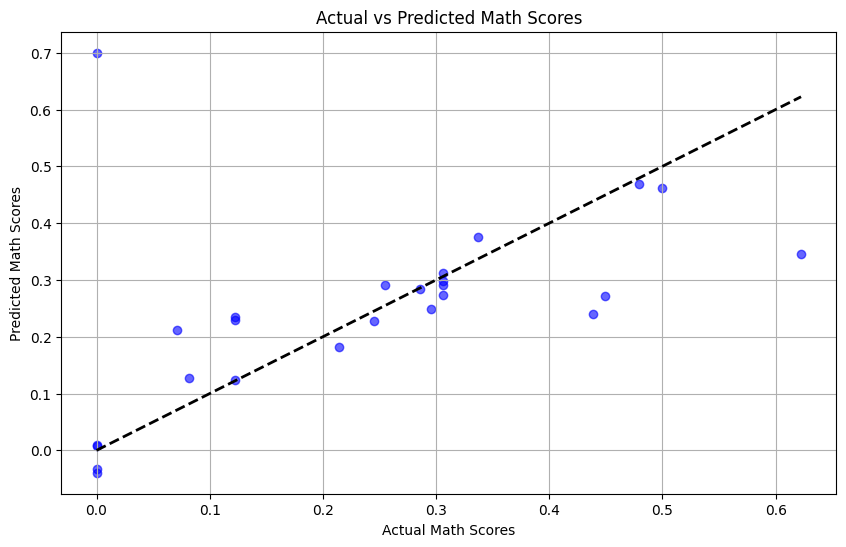

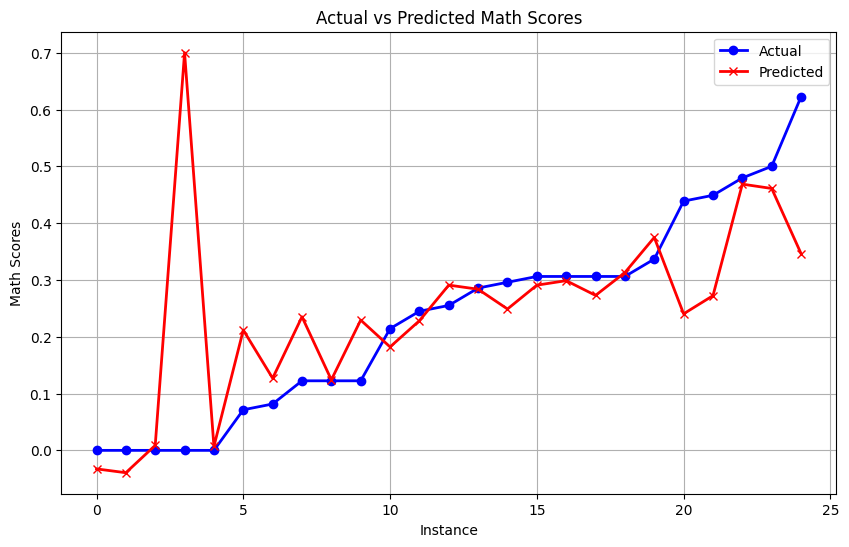

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Math Scores')
plt.title('Actual vs Predicted Math Scores')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt

sorted_indices = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test_sorted, marker='o', color='blue', label='Actual', linewidth=2)
plt.plot(range(len(y_test)), y_pred_sorted, marker='x', color='red', label='Predicted', linewidth=2)
plt.xlabel('Instance')
plt.ylabel('Math Scores')
plt.title('Actual vs Predicted Math Scores')
plt.legend()
plt.grid(True)
plt.show()